In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import contextily as cx

<IPython.core.display.Javascript object>

In [73]:
%load_ext nb_black
 # For automatic code formatting

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Data importation

In [74]:
for csv_file in os.listdir("./data"):
    if csv_file[-3:] == "csv":
        globals()[csv_file[:-4]] = pd.read_csv("./data/" + csv_file)

<IPython.core.display.Javascript object>

# Data cleaning

## cities

In [75]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               100 non-null    object 
 1   lat                100 non-null    float64
 2   lng                100 non-null    float64
 3   country            100 non-null    object 
 4   iso2               100 non-null    object 
 5   admin_name         100 non-null    object 
 6   capital            67 non-null     object 
 7   population         100 non-null    float64
 8   population_proper  100 non-null    float64
 9   is_warehouse       100 non-null    bool   
dtypes: bool(1), float64(4), object(5)
memory usage: 7.3+ KB


<IPython.core.display.Javascript object>

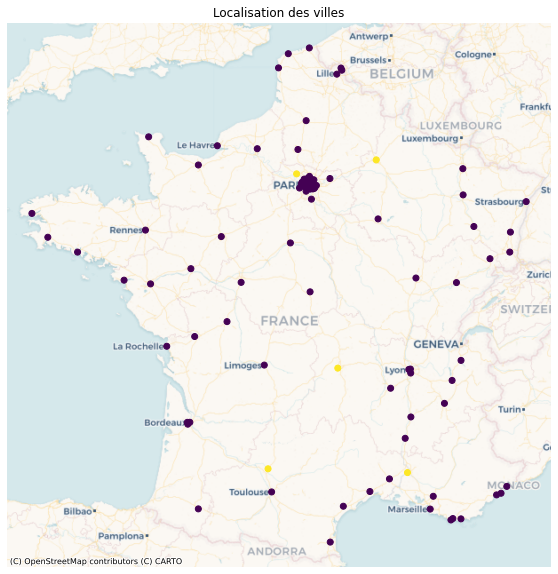

<IPython.core.display.Javascript object>

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities.lng, cities.lat), crs=4326)
gdf.to_crs(epsg=3857).plot(ax=ax, column="is_warehouse")
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, zoom=6)
ax.axis('off')
ax.set_title("Localisation des villes")
plt.show()

Text(0, 0.5, '')

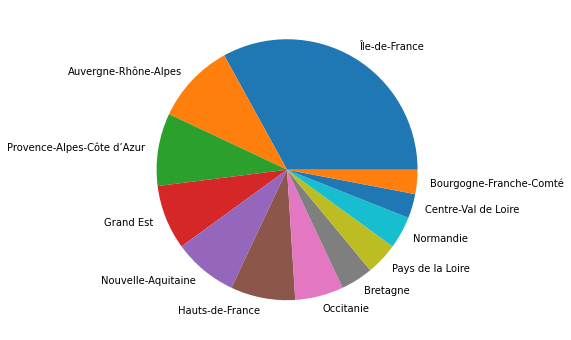

<IPython.core.display.Javascript object>

In [77]:
fig, ax = plt.subplots(figsize=(6, 6))
cities.admin_name.value_counts().plot(kind="pie", ax=ax)
ax.set_ylabel("")

In [78]:
cities.capital # ??

0     primary
1       minor
2       admin
3       admin
4       admin
       ...   
95      minor
96        NaN
97        NaN
98        NaN
99      minor
Name: capital, Length: 100, dtype: object

<IPython.core.display.Javascript object>

In [79]:
cities[["population_proper", "population"]] # ??

,population_proper,population
0,2148271.0,11020000.0
1,341032.0,1006402.0
2,486828.0,968638.0
3,868277.0,870018.0
4,217728.0,727357.0
...,...,...
95,56020.0,56020.0
96,55655.0,55655.0
97,55069.0,55588.0
98,54771.0,55084.0


<IPython.core.display.Javascript object>

<AxesSubplot:>

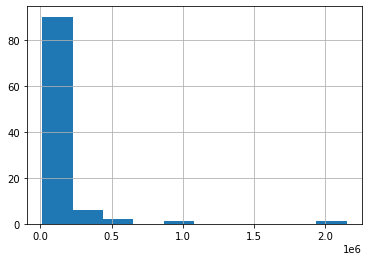

<IPython.core.display.Javascript object>

In [80]:
cities.population_proper.hist()

<AxesSubplot:>

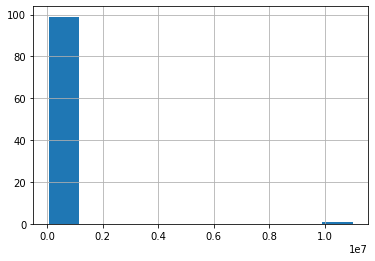

<IPython.core.display.Javascript object>

In [81]:
cities.population.hist()

In [82]:
cities.to_csv("data_clean/cities.csv")

<IPython.core.display.Javascript object>

## factors

In [83]:
factors = data["factors"]
factors

NameError: name 'data' is not defined

<IPython.core.display.Javascript object>

In [ ]:
factors.to_csv("data_clean/factors.csv")

<IPython.core.display.Javascript object>

## orders

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37332 entries, 0 to 37331
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            37332 non-null  object 
 1   package_id          37332 non-null  object 
 2   package_volume      37332 non-null  float64
 3   delivery_location   37332 non-null  object 
 4   from_warehouse      37332 non-null  object 
 5   order_date          37332 non-null  object 
 6   delivered_date      36131 non-null  object 
 7   n_units             37332 non-null  float64
 8   order_total_volume  37332 non-null  float64
dtypes: float64(3), object(6)
memory usage: 2.6+ MB


<IPython.core.display.Javascript object>

In [ ]:
orders.head()

,order_id,package_id,package_volume,delivery_location,from_warehouse,order_date,delivered_date,n_units,order_total_volume
0,EtPmaD3APj8aRNeSC3Yx7R,Z8722BWG8WfyrU3jeWsWGo,0.2732,Nice,Avignon,2021-01-01,2021-01-04 00:00:00,27.0,7.3764
1,4X4RBUwTXGBMVWdEj8Gti4,4oxrPXkner2kvXqvLQiCXF,0.2384,Issy-les-Moulineaux,Cergy,2021-01-01,2021-01-03 00:00:00,41.0,9.7744
2,GDhuTcBnr9xdRhFb2jLYcW,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Toulouse,Montauban,2021-01-01,2021-01-08 00:00:00,35.0,49.5320
3,3EZDvpzw5DdxXyJ66Py75J,3nwbxBUemtMG75cVPs7q7R,1.3451,Poitiers,Montauban,2021-01-01,2021-01-09 00:00:00,21.0,28.2471
4,Fpvw9NfnexSxjzLvyPWKbQ,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Épinal,Reims,2021-01-01,2021-01-09 00:00:00,22.0,31.1344


<IPython.core.display.Javascript object>

Tous les paquets sont disponibles partout.

In [ ]:
orders["order_date"] = pd.to_datetime(orders.order_date)

<IPython.core.display.Javascript object>

In [ ]:
print("Temps")
print("From: " + str(orders["order_date"].min()))
print("From: " + str(orders["order_date"].max()))

Temps
From: 2021-01-01 00:00:00
From: 2021-06-29 00:00:00


<IPython.core.display.Javascript object>

Ce dataset permet de nous donner une idée sur les habitudes des consommateurs (où ils sont, qu'est-ce qu'ils commandent, combien ils commandent, etc...).

On peut donc tirer des informations exogènes qui peuvent-être intéressante pour remodeler l'organisation logistique et en particulier la répartition des ressources.

In [ ]:
len(set(orders.order_id)) # All unique

37332

<IPython.core.display.Javascript object>

In [ ]:
orders[~ orders.delivery_location.isin(cities.city)] # We can join

,order_id,package_id,package_volume,delivery_location,from_warehouse,order_date,delivered_date,n_units,order_total_volume


<IPython.core.display.Javascript object>

In [ ]:
orders[~ orders.from_warehouse.isin(warehouses.warehouse_city)] # We can join

,order_id,package_id,package_volume,delivery_location,from_warehouse,order_date,delivered_date,n_units,order_total_volume


<IPython.core.display.Javascript object>

In [ ]:
orders = orders.dropna()
orders.to_csv("data_clean/orders.csv")

<IPython.core.display.Javascript object>

## packages

In [ ]:
packages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   package_id        50 non-null     object 
 1   package_volume    50 non-null     float64
 2   package_price     50 non-null     float64
 3   package_revenues  46 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


<IPython.core.display.Javascript object>

In [ ]:
packages.head()

,package_id,package_volume,package_price,package_revenues
0,jjnvac3HYvsrBQp9jxf5qj,1.0615,427.87,69.89
1,3nwbxBUemtMG75cVPs7q7R,1.3451,914.04,69.89
2,CwNUeLRRdqm5DhwCmr743i,0.2867,59.39,20.99
3,6H7ukEuzfShov54gB3sN6V,0.0020,12.87,4.89
4,eMZvEhv2562R9UEzTamYtC,2.7234,1882.33,69.89


<IPython.core.display.Javascript object>

<AxesSubplot:>

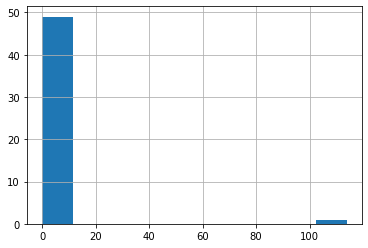

<IPython.core.display.Javascript object>

In [ ]:
packages.package_volume.hist()

In [ ]:
packages[packages["package_volume"]>50] # ! Problem

,package_id,package_volume,package_price,package_revenues
28,aBCDNfWx5TAkxbTTmQJEE4,113.8,209.75,20.99


<IPython.core.display.Javascript object>

Il y a un problème avec ce paquet, on peut regarder les commandes sur lesquelles il intervient

In [ ]:
orders[orders["package_id"] == "aBCDNfWx5TAkxbTTmQJEE4"]

,order_id,package_id,package_volume,delivery_location,from_warehouse,order_date,delivered_date,n_units,order_total_volume
6,UeVqLAt9h6sfuB9AwC3iwD,aBCDNfWx5TAkxbTTmQJEE4,0.1138,Beauvais,Cergy,2021-01-01,2021-01-04 00:00:00,47.0,5.3486
109,X6r8v76WyEedHt2Mgc7NvF,aBCDNfWx5TAkxbTTmQJEE4,0.1138,Mérignac,Montauban,2021-01-01,2021-01-04 00:00:00,39.0,4.4382
140,NECdkgqQmQ9eDF8waSeT2P,aBCDNfWx5TAkxbTTmQJEE4,0.1138,Perpignan,Montauban,2021-01-01,2021-01-04 00:00:00,42.0,4.7796
162,UeE4GPJk5KQFvvkM3HTbjF,aBCDNfWx5TAkxbTTmQJEE4,0.1138,Lille,Reims,2021-01-02,2021-01-03 00:00:00,46.0,5.2348
172,o74Nkex3tEZ89rXMF7Qrf5,aBCDNfWx5TAkxbTTmQJEE4,0.1138,Besançon,Reims,2021-01-02,2021-01-05 00:00:00,18.0,2.0484
...,...,...,...,...,...,...,...,...,...
37113,3qoW22NAHKoysf9kaqLSDS,aBCDNfWx5TAkxbTTmQJEE4,0.1138,Rouen,Cergy,2021-06-29,NaN,24.0,2.7312
37151,o6r5TAgFdmUmDJep9EBW7x,aBCDNfWx5TAkxbTTmQJEE4,0.1138,Orléans,Cergy,2021-06-29,NaN,6.0,0.6828
37183,id8wh5w9Y5URYmBiy3Gcev,aBCDNfWx5TAkxbTTmQJEE4,0.1138,Issy-les-Moulineaux,Cergy,2021-06-29,NaN,34.0,3.8692
37204,feqQQHdk9RHWT46W6vSbcw,aBCDNfWx5TAkxbTTmQJEE4,0.1138,Orléans,Cergy,2021-06-29,NaN,44.0,5.0072


<IPython.core.display.Javascript object>

L'erreur est d'un facteur 100, on corrige dans la base de données `packages`.

In [ ]:
packages.loc[28, "package_volume"] = 0.1138

<IPython.core.display.Javascript object>

<AxesSubplot:>

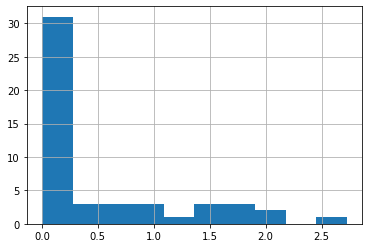

<IPython.core.display.Javascript object>

In [ ]:
packages.package_volume.hist()

<AxesSubplot:>

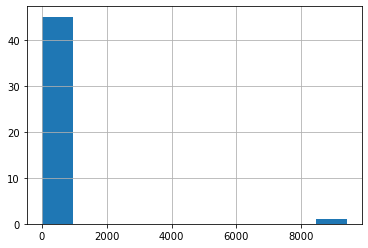

<IPython.core.display.Javascript object>

In [ ]:
packages.package_revenues.hist()

Un autre soucis à l'évidence.

In [ ]:
packages[packages.package_revenues>100]

,package_id,package_volume,package_price,package_revenues
36,bfvaknKja6jMJYp56vtjgf,0.0072,5.0,9401.28


<IPython.core.display.Javascript object>

Erreur sur `package_revenues`, le vrai revenu est 13.99

In [ ]:
packages.loc[36, "package_revenues"] = 13.99

<IPython.core.display.Javascript object>

<AxesSubplot:>

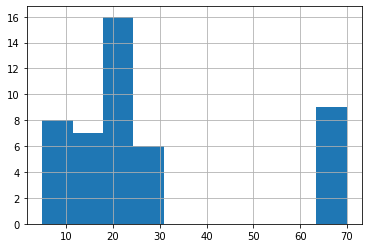

<IPython.core.display.Javascript object>

In [ ]:
packages.package_revenues.hist()

In [ ]:
packages.to_csv("data_clean/packages.csv")

<IPython.core.display.Javascript object>

## pricing

In [ ]:
pricing

,max_volume,pricing,comment
0,0.003,4.89,NaN
1,0.027,13.99,NaN
2,0.432,20.99,NaN
3,1.000,30.49,NaN
4,4.000,69.89,NaN
5,10.000,89.99,NaN


<IPython.core.display.Javascript object>

In [ ]:
pricing.to_csv("data_clean/pricing.csv")

<IPython.core.display.Javascript object>

## routes

In [ ]:
routes = pd.read_csv("data/routes_v2.csv")
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7426 entries, 0 to 7425
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   truck_id        7426 non-null   object 
 1   duration        7426 non-null   float64
 2   fill_volume     7426 non-null   float64
 3   n_units         7426 non-null   float64
 4   orders          7426 non-null   object 
 5   from_warehouse  7426 non-null   object 
 6   route_date      7426 non-null   object 
 7   stops           7426 non-null   object 
 8   total_distance  7426 non-null   float64
dtypes: float64(4), object(5)
memory usage: 522.3+ KB


<IPython.core.display.Javascript object>

In [ ]:
routes.head()

,truck_id,duration,fill_volume,n_units,orders,from_warehouse,route_date,stops,total_distance
0,jehwGBpNg2rDLeKoYeiaLs,2.167136,5.9879,87.0,nK4iPf8nrGA9yivRH66ehS > jnsH9ndQ3UKcWSbb2UMkFn,Clermont-Ferrand,2021-01-02,Clermont-Ferrand > Bourges,153.950611
1,XnzFnkALW3tLnzrdCVFyKH,23.230412,4.7060,190.0,XHfAWaLxTFbo5UQwtd7CMz > Wd6rPc4wPRNmt3ruf3F7o...,Cergy,2021-01-02,Cergy > Saint-Nazaire > Saint-Denis > Rouen > ...,1416.184102
2,dwQ5Xd6TwcXURBczFdRXVy,6.995822,10.9609,148.0,gQi59MNfDa5YFpVWxfmPin > FaqH6N2zWCeykLh5f9VPW...,Cergy,2021-01-02,Cergy > Boulogne-Billancourt > Aubervilliers >...,184.704129
3,A58tMgZVPfe2ucEBcCSXTW,4.785198,1.8904,79.0,7bzBdqUKWXyNrAhntXNrBq > BZsYUHDe4eVj7HaeM8MBt7,Reims,2021-01-02,Reims > Épinal > Troyes,390.851862
4,KRNfDAmUV8bRzkxhdAYfkj,4.413343,0.4536,63.0,DfN8XqUVeVHjTW3Pat76Tr > MUT2TaTikTsi8FzSCnimxv,Clermont-Ferrand,2021-01-03,Clermont-Ferrand > Villeurbanne,139.447356


<IPython.core.display.Javascript object>

<AxesSubplot:>

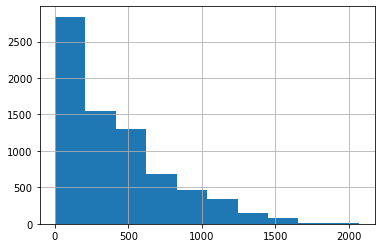

<IPython.core.display.Javascript object>

In [ ]:
routes.total_distance.hist()

In [ ]:
routes["route_date"] = pd.to_datetime(routes["route_date"])

<IPython.core.display.Javascript object>

<AxesSubplot:>

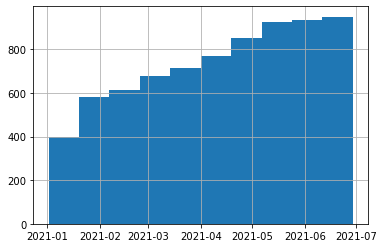

<IPython.core.display.Javascript object>

In [ ]:
routes["route_date"].hist()

Augmentation du nombre de trajet par jour sur les 6 mois ?

<AxesSubplot:>

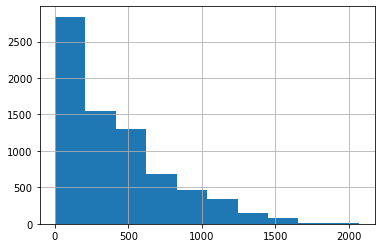

<IPython.core.display.Javascript object>

In [ ]:
routes["total_distance"].hist()

In [ ]:
routes["from_warehouse"].isin(warehouses.warehouse_city).all() # Les entrepôts sont corrects

True

<IPython.core.display.Javascript object>

In [ ]:
routes["orders"].str.split(" > ").explode().isin(orders.order_id).all() # Les id commande sont corrects

True

<IPython.core.display.Javascript object>

In [ ]:
routes["stops"].str.split(" > ").explode().isin(cities.city).all() # Les arrêts sont corrects

True

<IPython.core.display.Javascript object>

<AxesSubplot:>

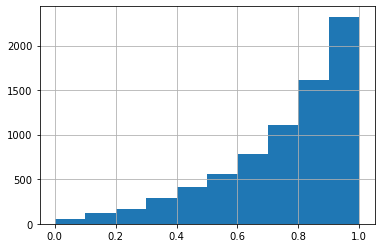

<IPython.core.display.Javascript object>

In [ ]:
(routes.fill_volume / trucks.truck_volume.iloc[0]).hist()

In [ ]:
routes.to_csv("data_clean/routes.csv")

<IPython.core.display.Javascript object>

- On peut essayer de représenter les trajets/parcours "classiques" pour chaque warehouse.
- On peut identifier la pression exercée sur les camions en regardant la distance totale parcourue par camion.
- On peut identifier les entrepôts les plus sollicités de la même façon mais en raisonnant par entrepôt. 

## trucks

In [ ]:
trucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   truck_id         250 non-null    object 
 1   truck_warehouse  250 non-null    object 
 2   truck_volume     250 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


<IPython.core.display.Javascript object>

In [ ]:
trucks.head()

,truck_id,truck_warehouse,truck_volume
0,hnxWnBLHwfeFX4Pz5smUN6,Clermont-Ferrand,81.25
1,mVUb5dkxfaSPBMKEujjeMg,Clermont-Ferrand,81.25
2,TF6RdRZmB5HycLNfYUCpwZ,Clermont-Ferrand,81.25
3,B5TgpouAP6EFb8GQ9GgXkN,Clermont-Ferrand,81.25
4,ieMkR4dENMAiSXofsiGeFg,Clermont-Ferrand,81.25


<IPython.core.display.Javascript object>

In [ ]:
trucks.truck_warehouse.value_counts()

Clermont-Ferrand    50
Cergy               50
Reims               50
Avignon             50
Montauban           50
Name: truck_warehouse, dtype: int64

<IPython.core.display.Javascript object>

On a donc 250 camions, répartis de façon uniforme dans les 5 entrepôts. Peut-être faudrait-il mettre en regard avec les populations couvertes par chaque entrepôt ?

Pour ce faire on pourrait découper le territoire en 5 (territoire couvert par chaque entrepôt), et comparer les niveaux de population

In [ ]:
trucks.truck_volume.value_counts()

81.25    250
Name: truck_volume, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
trucks.to_csv("data_clean/trucks.csv")

<IPython.core.display.Javascript object>

On peut faire une jointure avec `routes` sur `truck_id` pour **calculer le taux de remplissage des camions**.

## warehouses

In [ ]:
warehouses = data["warehouses"]
warehouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   warehouse_city  5 non-null      object
dtypes: object(1)
memory usage: 168.0+ bytes


<IPython.core.display.Javascript object>

In [ ]:
warehouses

,warehouse_city
0,Clermont-Ferrand
1,Cergy
2,Reims
3,Avignon
4,Montauban


<IPython.core.display.Javascript object>

In [ ]:
warehouses.to_csv("data_clean/warehouses.csv")

<IPython.core.display.Javascript object>

C'est pas une base de donnée très passionnante.